<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module3-reshape-data/LS_DS_123_Reshape_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [0]:
!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [2]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [3]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [4]:
#table1.columns
#table1.index
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [5]:
table1.reset_index() # Make index into columns so we can use melt function

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [6]:
table1.reset_index().melt() # not the same as the examples, need to set id_vars

,variable,value
0,index,John Smith
1,index,Jane Doe
2,index,Mary Johnson
3,treatmenta,NaN
4,treatmenta,16
5,treatmenta,3
6,treatmentb,2
7,treatmentb,11
8,treatmentb,1


In [7]:
tidy = table1.reset_index().melt(id_vars='index')

tidy # columns are still different

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [8]:
# Renaming columns to match example
tidy = tidy.rename(columns={'index': 'name',
                            'variable': 'trt',
                            'value': 'result'})
tidy # trt column still messy

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [9]:
# Replace 'treatment' in trt column with nothing
tidy.trt = tidy.trt.str.replace('treatment', '')
tidy # now same as example

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [10]:
# Replace a's and b's with 0s and 1s
tidy.trt.replace('a', 0).replace('b', 1)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [11]:
# Same as above but passing in dict
tidy.trt.replace({'a': 0, 'b': 1})

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [12]:
# Same as above but with map func
tidy.trt.map({'a': 0, 'b': 1})

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [13]:
# Same as above, but getting booleans first then making them 0s and 1s
(tidy.trt == 'b').astype(int)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

## Table 2 --> Tidy

In [14]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [15]:
# Turning the index into columns
tidy2 = table2.reset_index()
tidy2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [16]:
# Melting dataframe with index as id_vars
tidy2 = table2.reset_index().melt(id_vars='index')
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [17]:
# Renaming columns in the dataframe
tidy2 = tidy2.rename(columns={
    'index': 'trt',
    'variable': 'name',
    'value': 'result'
})

tidy2

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [18]:
# Replacing 'treatment' in the trt column with nothing
tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')
tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [19]:
# Getting back to original table with pivot
tidy.pivot_table(index='name', columns='trt', values='result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [20]:
# Getting back to original table2 with pivot function
tidy2.pivot_table(index='trt', columns='name', values='result')

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [21]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


## Seaborn uses tidy data



> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

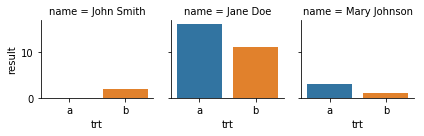

In [22]:
# Creating bar chart with tidy data
import seaborn as sns
sns.catplot(x='trt', y='result', col='name', kind='bar', data=tidy, height=2);

## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [23]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-01-16 22:17:27--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.99.21
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.99.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’

instacart_online_gr 100%[===================>] 196.03M  86.0MB/s    in 2.3s    

2019-01-16 22:17:29 (86.0 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’ saved [205548478/205548478]



In [24]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


Run these cells to load the data

In [25]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
products = pd.read_csv('products.csv') # Reading products csv to create a dataframe

# Reading both order_products__prior and order_products__train csv's and concatenating them at the same time to make a dataframe
order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')# Reading orders csv to create a dataframe

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [27]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [28]:
# List columns in dataframes
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [29]:
# No columns in common with above df
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [30]:
# This df has columns in common with the two dataframes above
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
a = products[['product_id', 'product_name']]
b = order_products[['order_id', 'product_id', 'add_to_cart_order']]
c = orders[['order_id', 'order_hour_of_day','user_id', 'order_number']]

merged1 = pd.merge(a, b)
merged2 = pd.merge(merged1, c)

In [33]:
merged2.shape

(33819106, 7)

In [34]:
merged2.head()

,product_id,product_name,order_id,add_to_cart_order,order_hour_of_day,user_id,order_number
0,1,Chocolate Sandwich Cookies,1107,7,11,38259,2
1,769,Sliced American Cheese,1107,10,11,38259,2
2,6184,Clementines,1107,14,11,38259,2
3,8048,Packaged Grape Tomatoes,1107,15,11,38259,2
4,9007,Frosted Flakes,1107,17,11,38259,2


In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [0]:
# This is equivalent...
# condition = ((merged2.product_name=='Half Baked Frozen Yogurt') |
#             (merged2.product_name=='Half and Half Ultra Pasteurized'))

# ...to this:

condition = merged2.product_name.isin(product_names)

subset = merged2[condition]

In [111]:
subset.shape

(5978, 7)

In [112]:
subset.sample(n=10)

,product_id,product_name,order_id,add_to_cart_order,order_hour_of_day,user_id,order_number
9582235,9292,Half And Half Ultra Pasteurized,254243,4,16,122725,48
12897041,30668,Half Baked Frozen Yogurt,12012,12,20,100359,7
23721074,30668,Half Baked Frozen Yogurt,707618,7,15,85324,9
20471588,30668,Half Baked Frozen Yogurt,645976,3,16,73264,8
4027563,9292,Half And Half Ultra Pasteurized,130401,16,9,204757,40
29501659,30668,Half Baked Frozen Yogurt,1739270,10,9,147311,15
27872938,9292,Half And Half Ultra Pasteurized,2644141,2,16,73951,17
29197349,9292,Half And Half Ultra Pasteurized,1677253,2,10,110228,19
2791588,9292,Half And Half Ultra Pasteurized,1540956,7,8,190977,5
21016129,9292,Half And Half Ultra Pasteurized,1882828,1,7,51345,8


## 4 ways to reshape and plot

In [39]:
display(example)

### 1. value_counts

In [0]:
cream = subset[subset.product_name=='Half And Half Ultra Pasteurized']
froyo = subset[subset.product_name=='Half Baked Frozen Yogurt']

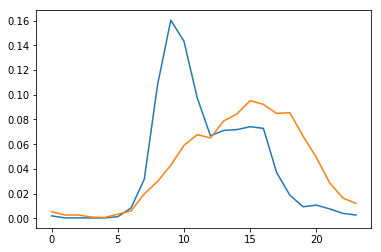

In [114]:
(cream
 .order_hour_of_day
 .value_counts(normalize=True)
 .sort_index()
 .plot())

(froyo
 .order_hour_of_day
 .value_counts(normalize=True)
 .sort_index()
 .plot());

### 2. crosstab

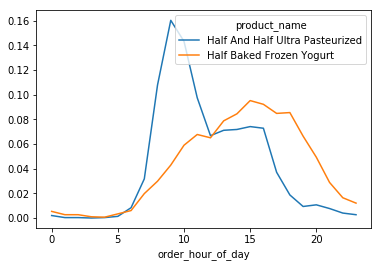

In [42]:
pd.crosstab(subset.order_hour_of_day,
           subset.product_name, normalize='columns').plot()

# Use normalize=columns to get same result as above
# With normalize=True it was counting both columns at once,
# We want ot count each column separately

### 3. pivot_table

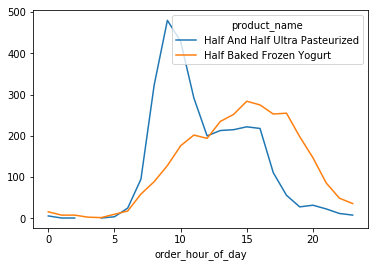

In [43]:
subset.pivot_table(index='order_hour_of_day',
                  columns = 'product_name',
                  values='order_id',
                  aggfunc=len).plot()
# y-axis showing raw counts

### 4. melt

In [0]:
table = pd.crosstab(subset.order_hour_of_day, subset.product_name, normalize=True)

In [0]:
melted = (table
          .reset_index()
          .melt(id_vars='order_hour_of_day')
          .rename(columns={
              'order_hour_of_day': 'Hour of Day Ordered', 
              'product_name': 'Product', 
              'value': 'Percent of Orders by Product'
          }))

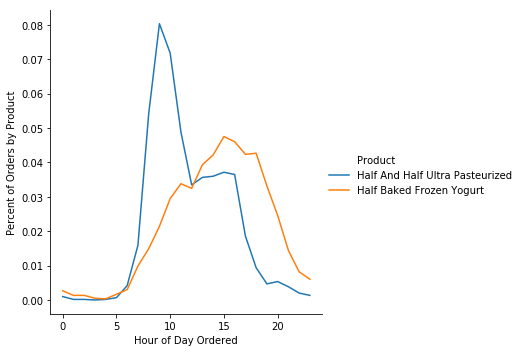

In [46]:
sns.relplot(x='Hour of Day Ordered', 
            y='Percent of Orders by Product', 
            hue='Product', 
            data=melted, 
            kind='line');

# ASSIGNMENT
- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
  - Table 2 --> Tidy
  - Tidy --> Table 2

- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table with showing the number of flights by month and year. Use year for the index and month for the columns. You've done it right if you get 112 flights for January 1949 and 432 flights for December 1960.

In [47]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [48]:
flights.shape

(144, 3)

In [49]:
# Changing initial flights dataframe into pivot
#help(flights.pivot)
flights = flights.pivot(index='month', columns='year', values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [50]:
flights.shape

(12, 12)

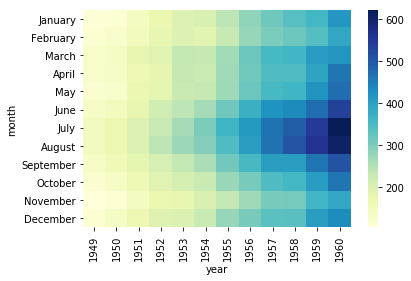

In [51]:
ax = sns.heatmap(flights, cmap="YlGnBu")
#help(sns.heatmap)

- Then use seaborn's `heatmap` function to visualize the pivot table. It should look like this:

![](https://seaborn.pydata.org/_images/seaborn-heatmap-4.png)

# STRETCH OPTIONS

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [52]:
merged2.head()

,product_id,product_name,order_id,add_to_cart_order,order_hour_of_day,user_id,order_number
0,1,Chocolate Sandwich Cookies,1107,7,11,38259,2
1,769,Sliced American Cheese,1107,10,11,38259,2
2,6184,Clementines,1107,14,11,38259,2
3,8048,Packaged Grape Tomatoes,1107,15,11,38259,2
4,9007,Frosted Flakes,1107,17,11,38259,2


**orders column list:**
['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [54]:
df = merged2.nlargest(int(len(merged2) * 0.05), 'order_number')
df.head()

,product_id,product_name,order_id,add_to_cart_order,order_hour_of_day,user_id,order_number
18711,1,Chocolate Sandwich Cookies,2871337,15,12,189024,100
18712,2433,Meyer Lemons,2871337,4,12,189024,100
18713,5971,Salt & Pepper Pistachios,2871337,6,12,189024,100
18714,6184,Clementines,2871337,1,12,189024,100
18715,6510,Milk Chocolate,2871337,14,12,189024,100


In [55]:
df.shape

(1690955, 7)

In [66]:
df.sort_values(by=['user_id', 'order_number', 'add_to_cart_order']).head()

,product_id,product_name,order_id,add_to_cart_order,order_hour_of_day,user_id,order_number
8073028,1194,Natural Artisan Water,65724,1,15,27,54
8073029,24852,Banana,65724,2,15,27,54
8139291,45123,Organic 21 Grain Thin Sliced Bread,2244394,1,16,27,55
8139277,8736,Synergy Organic & Raw Cosmic Cranberry,2244394,2,16,27,55
8139278,9604,Hibiscus Organic Raw Kombucha,2244394,3,16,27,55


In [58]:
df['order_number'].min()

54

In [0]:
#df['order_number'].value_counts()
#help(df['order_number'].value_counts())

In [0]:
#df = df[['user_id', 'order_number', 'product_name']]
#df.head()

In [72]:
ct = pd.crosstab(df['user_id'], df['order_number']).head(50)
ct

order_number,54,55,56,57,58,59,60,61,62,63,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
27,2,19,21,8,2,12,2,12,3,13,...,0,0,0,0,0,0,0,0,0,0
50,11,8,11,4,7,7,11,4,7,14,...,0,0,0,0,0,0,0,0,0,0
54,11,6,2,19,5,5,9,13,13,5,...,0,0,0,0,0,0,0,0,0,0
90,0,8,4,7,6,4,5,10,11,6,...,0,0,0,0,0,0,0,0,0,0
140,16,20,11,15,34,11,16,27,7,14,...,0,0,0,0,0,0,0,0,0,0
152,0,15,22,10,11,17,13,21,7,6,...,0,0,0,0,0,0,0,0,0,0
195,0,3,3,3,4,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,0,16,6,25,9,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,0,7,9,19,16,19,12,14,12,20,...,13,24,13,21,14,16,14,24,18,22


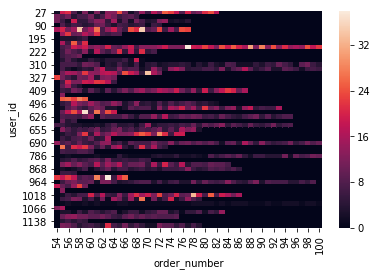

In [73]:
ax = sns.heatmap(ct)

In [0]:
#merged3.sort_values(by='user_id')